Saving sample_640×426.bmp to sample_640×426.bmp


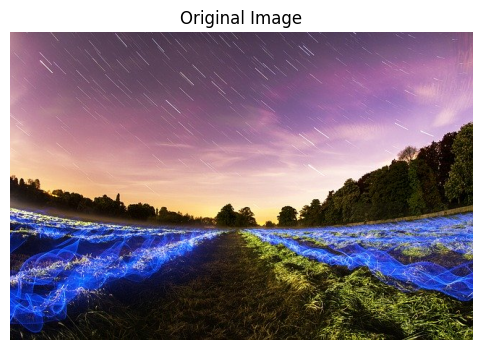

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import os

# Upload an image
uploaded = files.upload()

# Get the uploaded filename
image_filename = list(uploaded.keys())[0]

# Read the image
image = cv2.imread(image_filename)

# Convert to RGB (OpenCV loads in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(8, 4))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


Original Image Size: 798.88 KB
JPEG Compressed Size: 38.76 KB
PNG Compressed Size: 509.95 KB


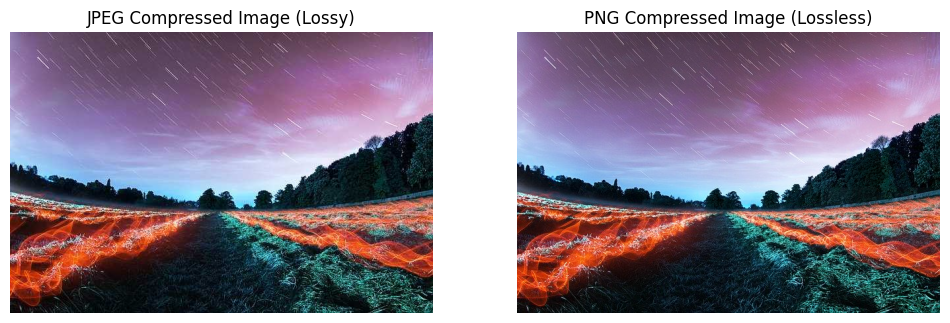

In [8]:
# Save as JPEG (Lossy Compression)
jpeg_filename = "compressed_image.jpg"
cv2.imwrite(jpeg_filename, image, [int(cv2.IMWRITE_JPEG_QUALITY), 50])  # 50% quality

# Save as PNG (Lossless Compression)
png_filename = "compressed_image.png"
cv2.imwrite(png_filename, image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])  # Max compression

# Check file sizes
original_size = os.path.getsize(image_filename) / 1024  # KB
jpeg_size = os.path.getsize(jpeg_filename) / 1024  # KB
png_size = os.path.getsize(png_filename) / 1024  # KB

print(f"Original Image Size: {original_size:.2f} KB")
print(f"JPEG Compressed Size: {jpeg_size:.2f} KB")
print(f"PNG Compressed Size: {png_size:.2f} KB")

# Display compressed images
compressed_jpeg = Image.open(jpeg_filename)
compressed_png = Image.open(png_filename)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(compressed_jpeg)
ax[0].set_title("JPEG Compressed Image (Lossy)")
ax[0].axis("off")

ax[1].imshow(compressed_png)
ax[1].set_title("PNG Compressed Image (Lossless)")
ax[1].axis("off")

plt.show()

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Function to plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # ROC & AUC
    fpr, tpr, _ = roc_curve(y_test.ravel(), model.predict(X_test).ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.2437 - loss: 2.2152 - val_accuracy: 0.6750 - val_loss: 1.7456
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6904 - loss: 1.4999 - val_accuracy: 0.8778 - val_loss: 0.7349
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8356 - loss: 0.7102 - val_accuracy: 0.9000 - val_loss: 0.3954
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8931 - loss: 0.4288 - val_accuracy: 0.9389 - val_loss: 0.2627
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9193 - loss: 0.3117 - val_accuracy: 0.9500 - val_loss: 0.2091
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9362 - loss: 0.2464 - val_accuracy: 0.9639 - val_loss: 0.1606
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9389 - loss: 0.2023 - val_accuracy: 0.9639 - val_loss: 0.1364
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9723 - loss: 0.1409 - val_accuracy: 0.9611 - val_loss

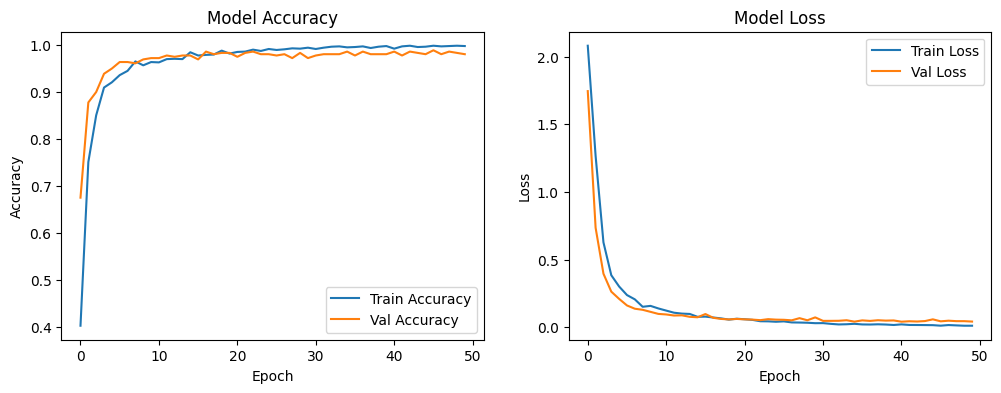

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      0.97      0.98        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



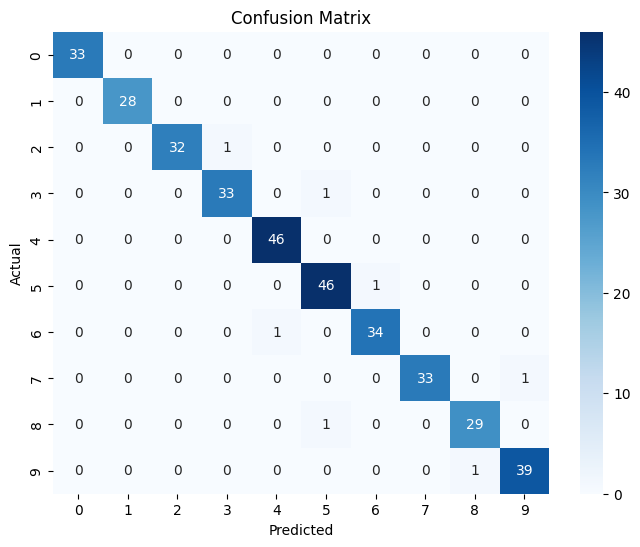

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


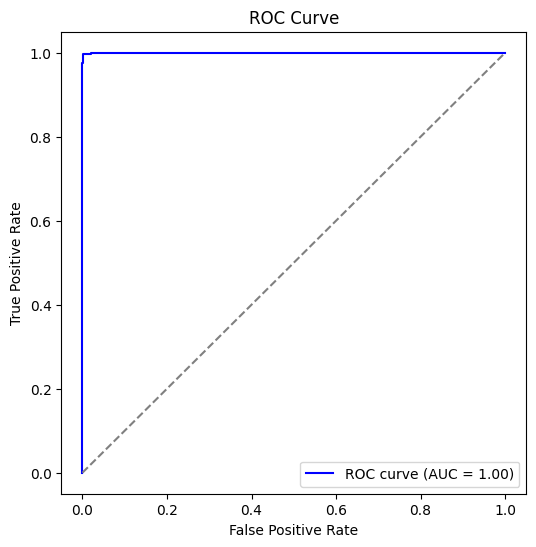

In [5]:

# Load Digits dataset
digits = load_digits()
X, y = digits.images, digits.target

# Normalize pixel values
X = X / 16.0

# Reshape to (n_samples, 8, 8, 1) for CNN
X = X.reshape(-1, 8, 8, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
model_digits = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
model_digits.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history_digits = model_digits.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate
plot_history(history_digits)
evaluate_model(model_digits, X_test, y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3265 - loss: 1.8250 - val_accuracy: 0.5180 - val_loss: 1.3385
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5187 - loss: 1.3408 - val_accuracy: 0.5987 - val_loss: 1.1316
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5813 - loss: 1.1836 - val_accuracy: 0.6176 - val_loss: 1.0773
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6202 - loss: 1.0830 - val_accuracy: 0.6452 - val_loss: 1.0091
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6525 - loss: 0.9899 - val_accuracy: 0.6528 - val_loss: 0.9794
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6678 - loss: 0.9422 - val_accuracy: 0.6641 - val_loss: 0.9450
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6898 - loss: 0.8843 - val_accuracy: 0.6791 - val_loss: 0.9096
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7045 - loss: 0.8402 - val_accuracy: 0.

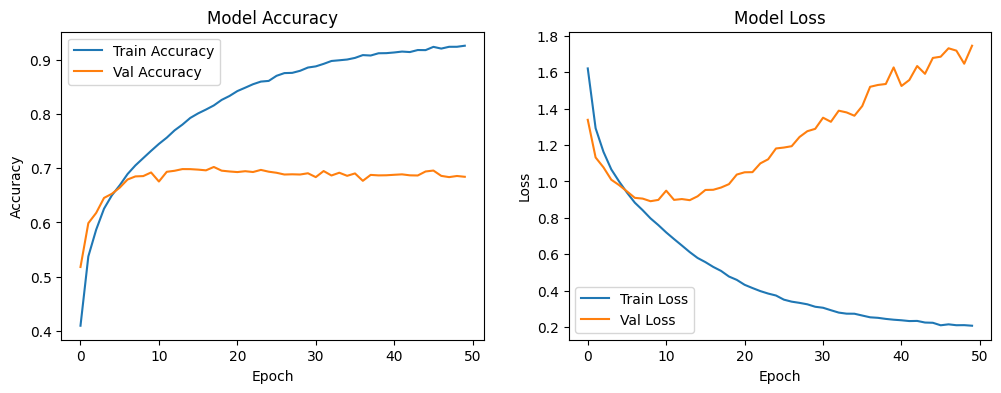

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.77      0.82      0.80      1000
           2       0.61      0.57      0.59      1000
           3       0.52      0.46      0.49      1000
           4       0.62      0.65      0.64      1000
           5       0.59      0.53      0.56      1000
           6       0.78      0.74      0.76      1000
           7       0.68      0.77      0.72      1000
           8       0.81      0.76      0.79      1000
           9       0.72      0.79      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



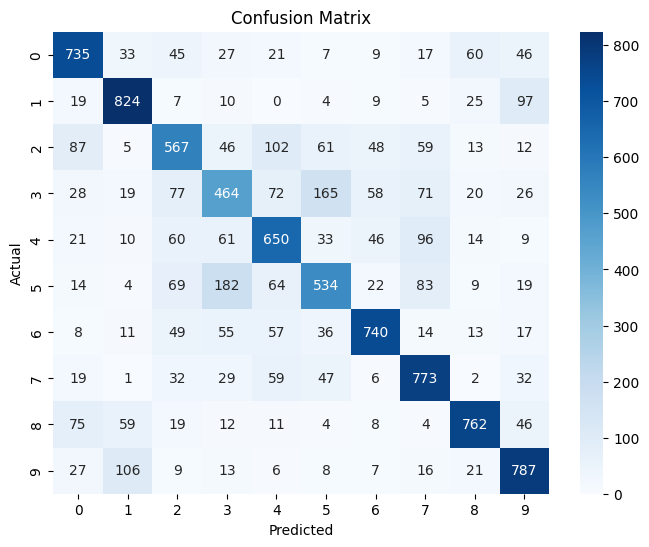

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


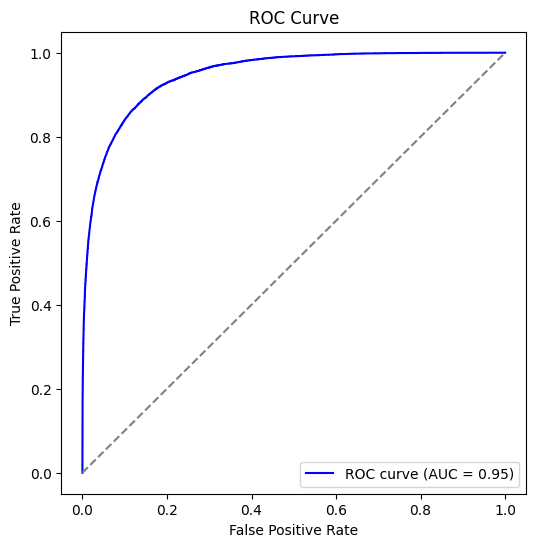

In [6]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize images (0 to 1 range)
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode labels
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

# Split dataset into 80% train, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define CNN model
model_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history_cifar = model_cifar.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate
plot_history(history_cifar)
evaluate_model(model_cifar, X_test, y_test)
